# [作業目標]
- 仿造範例的 One Hot Encoding, 將指定的資料進行編碼

# [作業重點]
- 將 sub_train 進行 One Hot Encoding 編碼 (In[4], Out[4])

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 設定 data_path, 並讀取 app_train
dir_data = 'Day6/data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

## 作業
將下列部分資料片段 sub_train 使用 One Hot encoding, 並觀察轉換前後的欄位數量 (使用 shape) 與欄位名稱 (使用 head) 變化

In [4]:
sub_train = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
print(sub_train.shape)
sub_train.head()

(307511, 1)


,WEEKDAY_APPR_PROCESS_START
0,WEDNESDAY
1,MONDAY
2,MONDAY
3,WEDNESDAY
4,THURSDAY


In [5]:
id = sub_train.iloc[:,0].value_counts().index
count = sub_train.value_counts().values
order = ['MONDAY', 'TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']

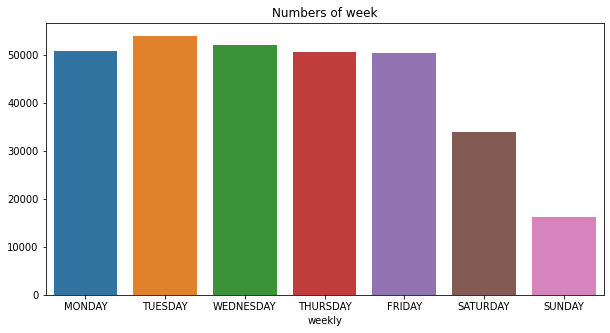

In [6]:
# 觀察各週間的數量
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(y=count, x=id, order=order)
ax.set_xlabel('weekly')
plt.title('Numbers of week')
plt.show()

## 自定義 mapping 的方式

In [7]:
label = dict(zip(order, [1,2,3,4,5,6,7]))
label

{'MONDAY': 1,
 'TUESDAY': 2,
 'WEDNESDAY': 3,
 'THURSDAY': 4,
 'FRIDAY': 5,
 'SATURDAY': 6,
 'SUNDAY': 7}

In [8]:
# 原始數據
print(sub_train[:5])

  WEEKDAY_APPR_PROCESS_START
0                  WEDNESDAY
1                     MONDAY
2                     MONDAY
3                  WEDNESDAY
4                   THURSDAY


In [9]:
# labelencoder mapping 後的結果
# 讓Monday 對應的數字為1，Tuesday 對應數字為2，以此類推
print(sub_train['WEEKDAY_APPR_PROCESS_START'].map(label)[:5])

0    3
1    1
2    1
3    3
4    4
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


### 使用get_dummies 製作 Onehotencoder

pd.get_dummies 很方便，一行就可以搞定新增欄位並且名稱也轉換了

In [11]:
onehot = pd.get_dummies(sub_train['WEEKDAY_APPR_PROCESS_START'])
print(onehot.shape)
print(onehot.head())

(307511, 7)
   FRIDAY  MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNESDAY
0       0       0         0       0         0        0          1
1       0       1         0       0         0        0          0
2       0       1         0       0         0        0          0
3       0       0         0       0         0        0          1
4       0       0         0       0         1        0          0


## 使用sklearn 模組進行OneHotEncoder, LabelEncoder

In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder()
lbe = LabelEncoder()

In [143]:
type(sub_train.shape)

tuple

In [148]:
# Labelencoder 
X = lbe.fit_transform(sub_train.iloc[:,0])
print(sub_train.head())
print(f'shape : {X.shape}')
print(X[:5])

  WEEKDAY_APPR_PROCESS_START
0                  WEDNESDAY
1                     MONDAY
2                     MONDAY
3                  WEDNESDAY
4                   THURSDAY
shape : (307511,)
[6 1 1 6 4]


In [12]:
# Onehotencoder 方式
sub_train_ohe = ohe.fit_transform(sub_train).toarray()
col_name = ['week_0','week_1','week_2','week_3','week_4','week_5','week_6']
sub_train_ohe = pd.DataFrame(sub_train_ohe, columns=col_name)


NameError: name 'ohe' is not defined

In [154]:
print(sub_train_ohe.shape)
print(sub_train_ohe.head())

(307511, 7)
   week_0  week_1  week_2  week_3  week_4  week_5  week_6
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0
1     0.0     1.0     0.0     0.0     0.0     0.0     0.0
2     0.0     1.0     0.0     0.0     0.0     0.0     0.0
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0
4     0.0     0.0     0.0     0.0     1.0     0.0     0.0
